# Proyecto 3: Grid cells + CEBRA

Desafío: trabajar con datos nuevos del paper: https://www.nature.com/articles/s41586-021-04268-7

Pregunta: Podemos encontrar el espacio latente de las grid cells? Podemos inferir la posición de la rata ?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import pandas as pd
from scipy.io import savemat


Bajar los datos de https://figshare.com/articles/dataset/Toroidal_topology_of_population_activity_in_grid_cells/16764508 

In [ ]:
data = np.load('../rat_r_day1_grid_modules_1_2_3.npz', allow_pickle=True)

In [ ]:
#Open field --> behavior
#open_field_1, start=7457, end=16045, valid_times=[7457,14778;14890,16045]
start1= 7457.01
end1  = 14778.00
tmin1 = int((start1-data['t'].min())*100)
tmax1 = int((end1-data['t'].min())*100)
start2= 14890.01
end2  = 16045.00
tmin2 = int((start2-data['t'].min())*100)
tmax2 = int((end2-data['t'].min())*100)

plt.scatter(data['x'][np.r_[tmin1:tmax1, tmin2:tmax2]], data['y'][np.r_[tmin1:tmax1, tmin2:tmax2]], s = 0.005)

In [9]:
positions = np.column_stack([data['x'][np.r_[tmin1:tmax1, tmin2:tmax2]], data['y'][np.r_[tmin1:tmax1, tmin2:tmax2]]])

In [ ]:
def linear_combination(data_pos, data_spikes, index0, t0, delta_t):
    # Function to compute the linear combination of positions based on spike times
    n = len(index0)
    index1 = [int(x) for x in index0 + np.ones(n)]
    v = (data_pos[index1]-data_pos[index0])/delta_t * (data_spikes-t0) + data_pos[index0]
    return v

mod = data['spikes_mod1'].item()
pos = {}
tmin = data['t'].min()

# Calculate positions for each cell in the module
# The module contains spikes for different cells, we will extract the positions based on the spikes
for cell, spikes in mod.items():
    spikes = mod[cell]
    openfield = spikes[np.logical_or((spikes<end1) & (spikes>start1), (spikes<end2) & (spikes>start2))]
    nspikes = len(openfield)
    pos[cell] = np.zeros((2, nspikes))
    t0 = np.floor(openfield*100)/100 #2 decimals
    index0 = [int(x) for x in np.floor((t0-tmin)*100)]
    pos[cell][0] = linear_combination(data['x'], openfield, index0, t0, 0.01)
    pos[cell][1] = linear_combination(data['y'], openfield, index0, t0, 0.01)

In [13]:
def discretize(cell_dgm, m=0, M=1, res=30, filt=None, sigma=0.5):
    '''
    Discretize one cell map, returns a 2D-histogram of size (res x res), the grid representing [m, M]^2.
    '''
    h2d = np.histogram2d(cell_dgm[0,:], cell_dgm[1,:], bins=res, range=[[m, M],[m, M]])[0]
    h2d = np.flip(h2d.T, axis=0)
    if filt=="gaussian":
        h2d = gaussian_filter(h2d, sigma=sigma)
    return h2d

0


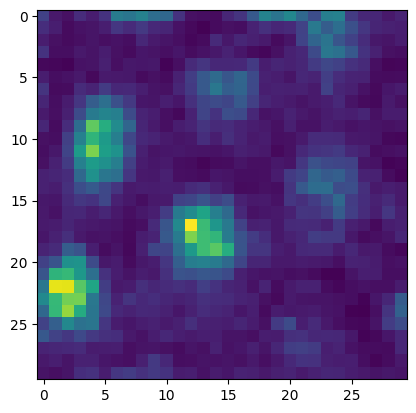

1


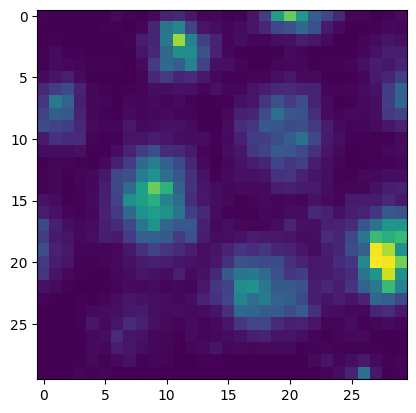

2


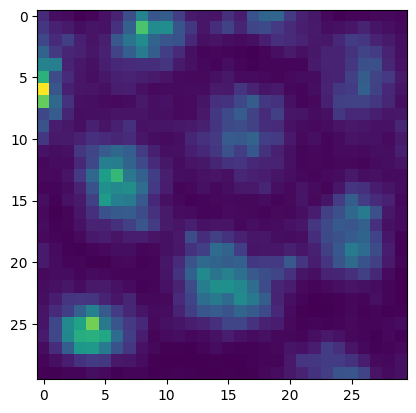

3


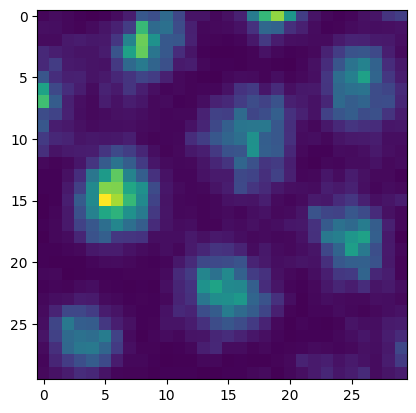

4


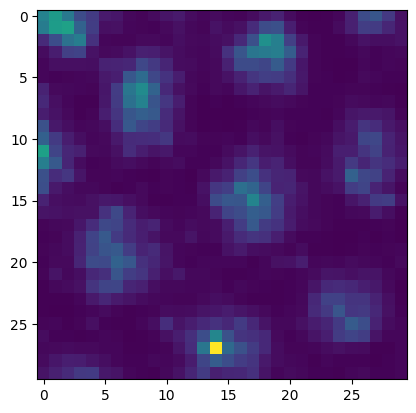

5


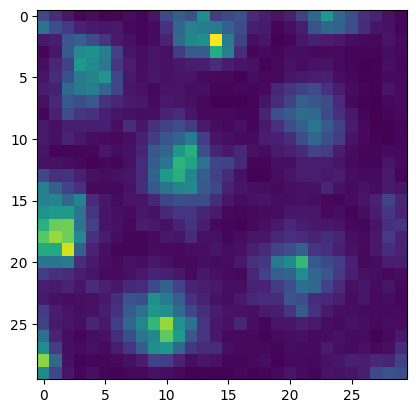

6


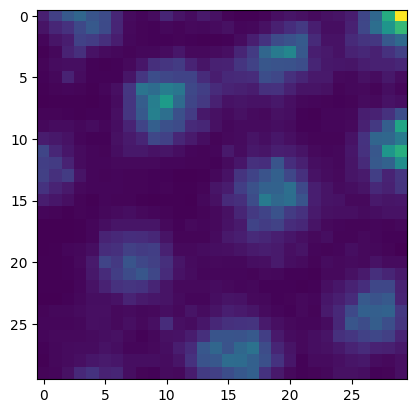

7


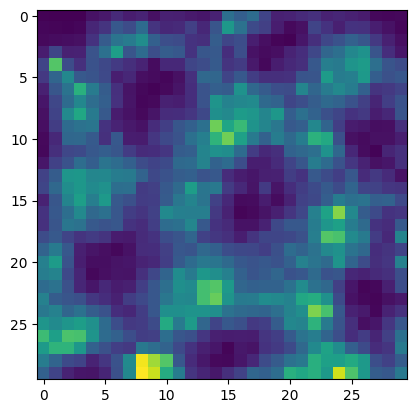

8


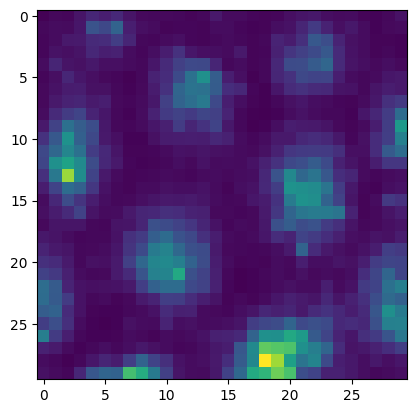

9


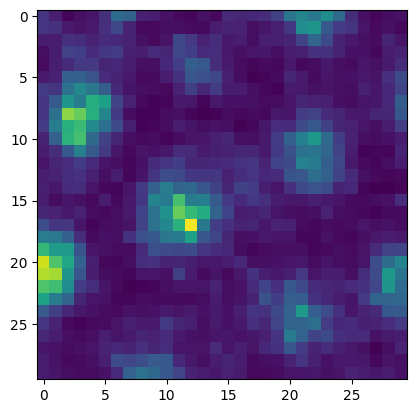

10


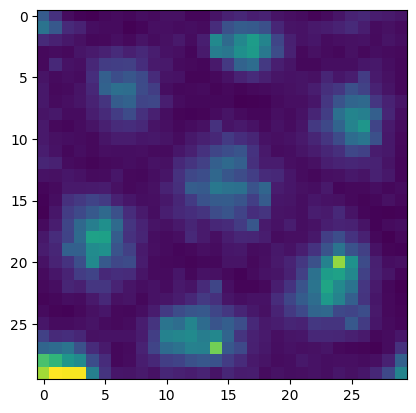

11


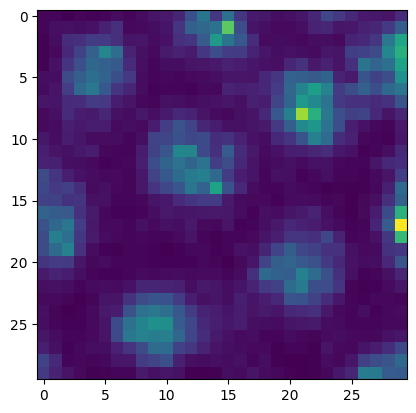

12


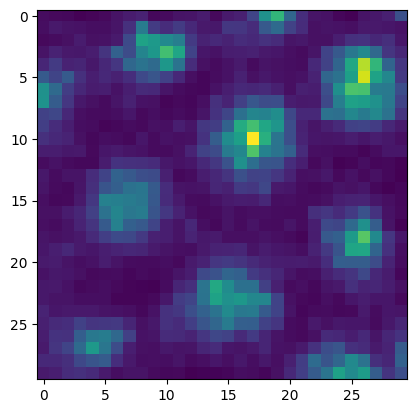

13


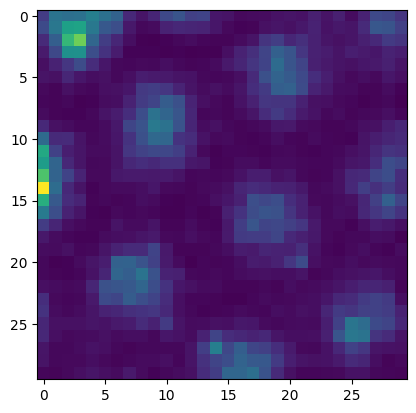

14


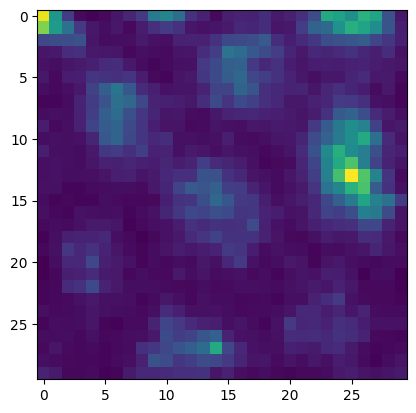

15


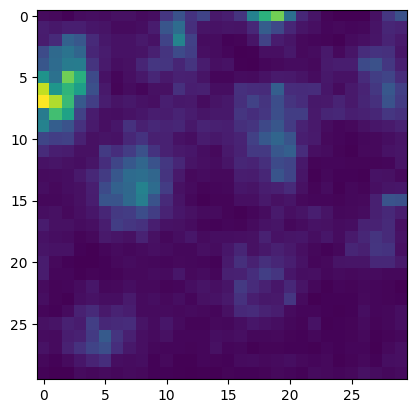

16


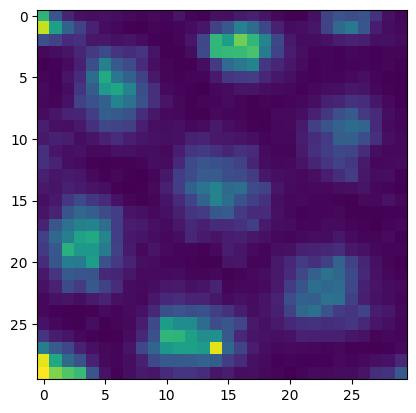

17


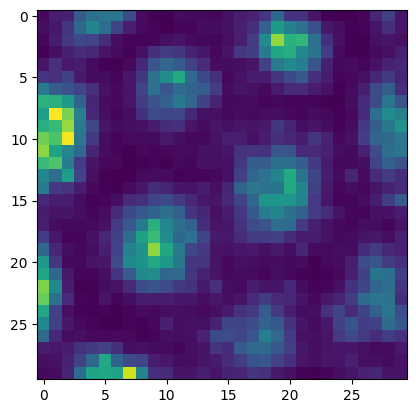

18


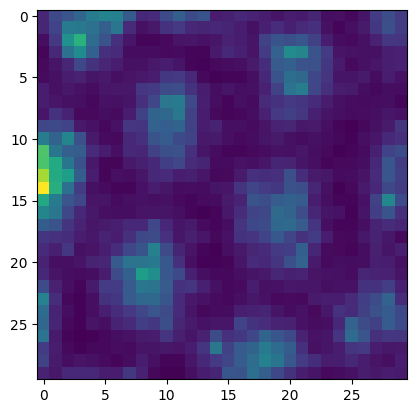

19


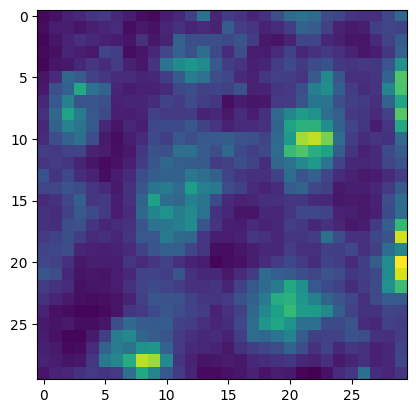

20


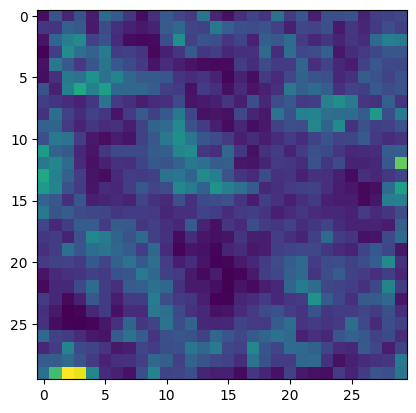

21


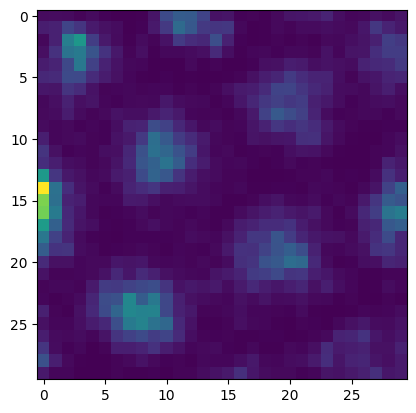

22


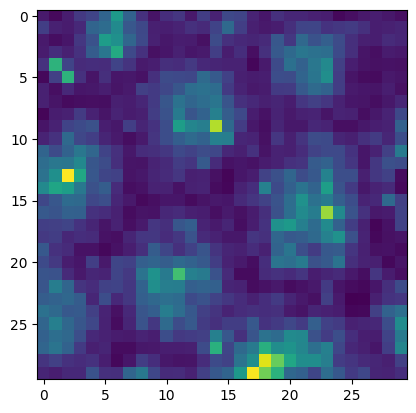

23


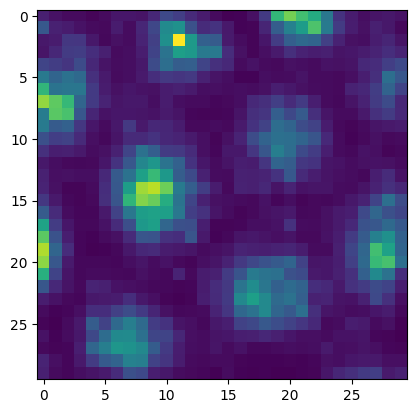

24


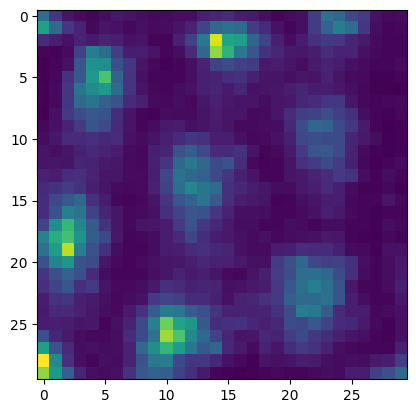

25


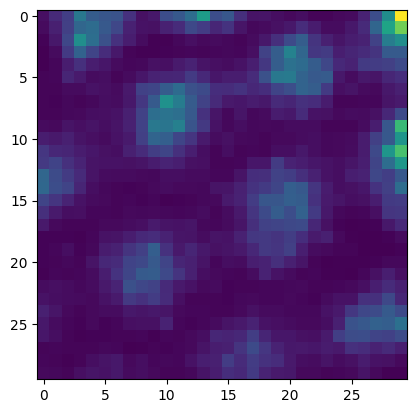

26


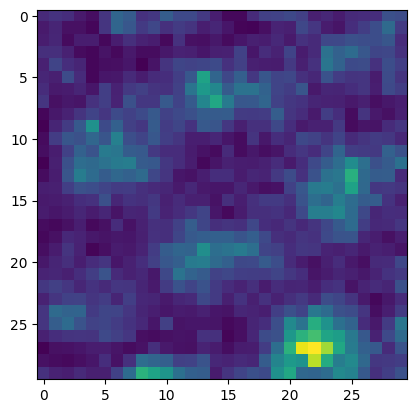

27


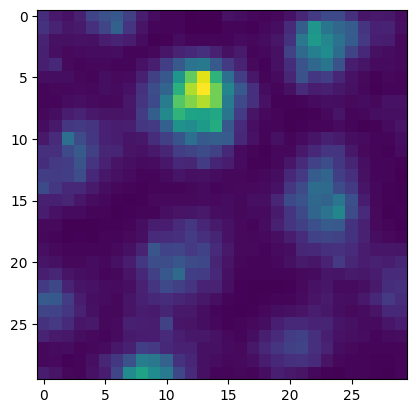

28


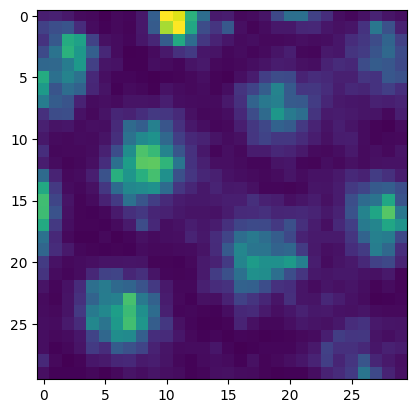

29


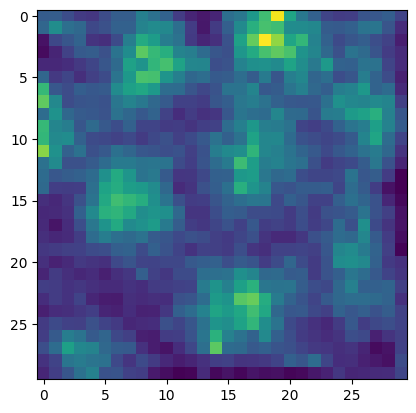

30


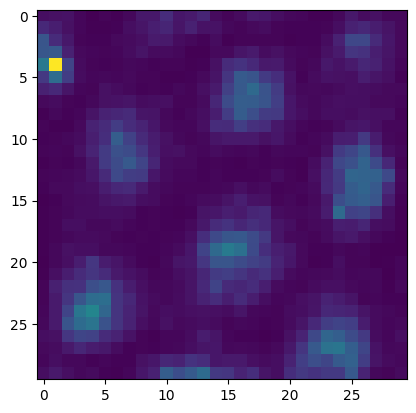

31


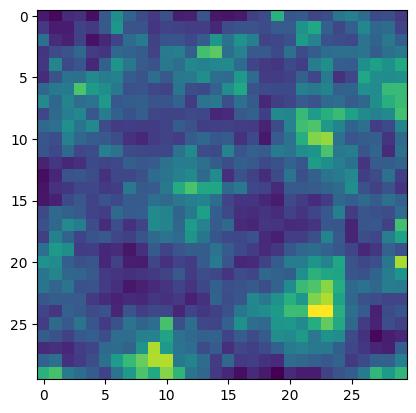

32


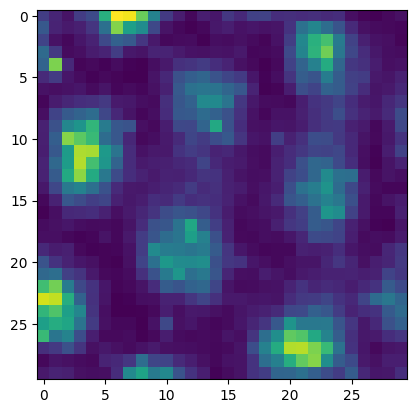

33


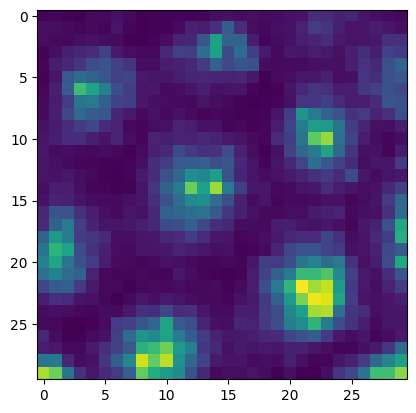

34


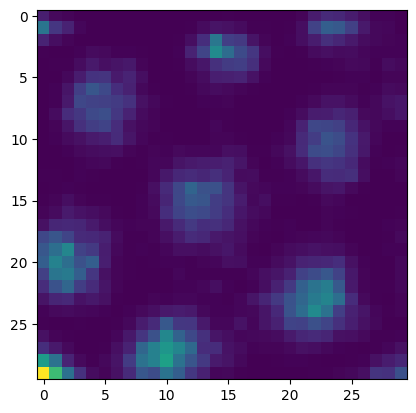

35


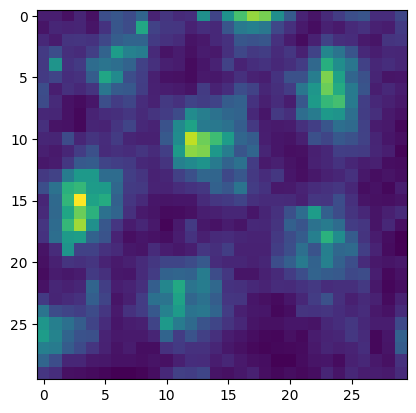

36


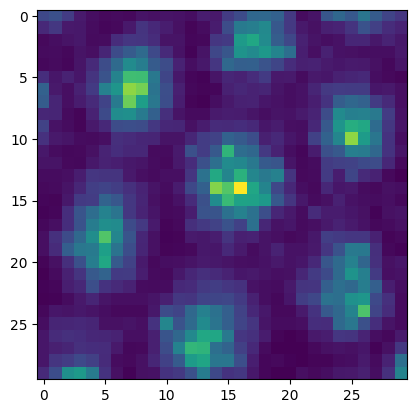

37


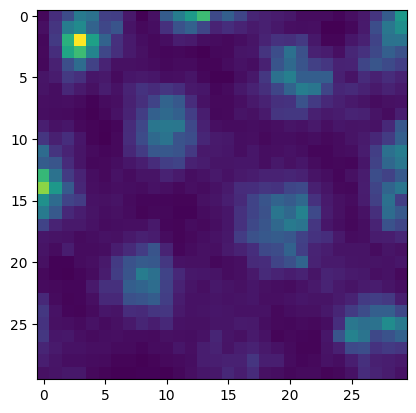

38


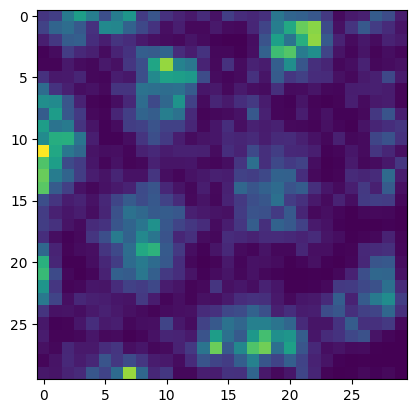

39


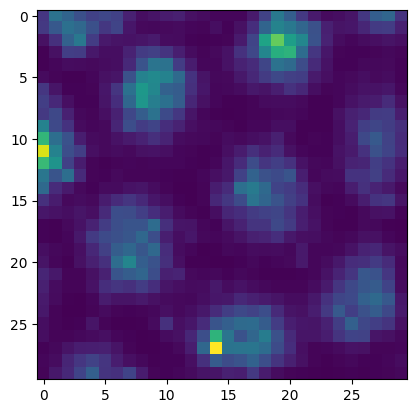

40


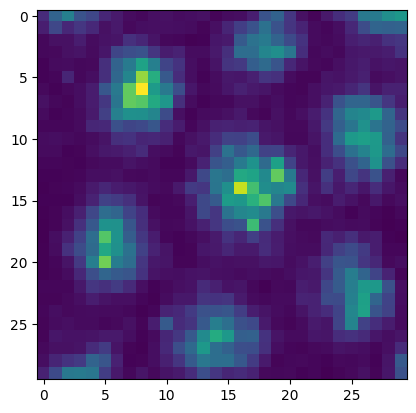

41


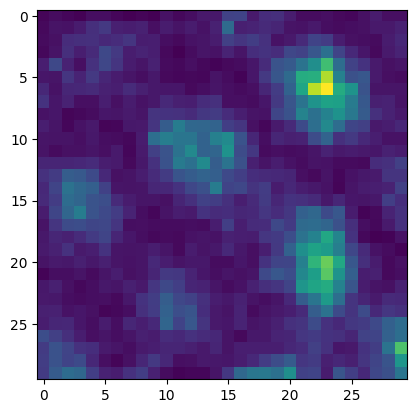

42


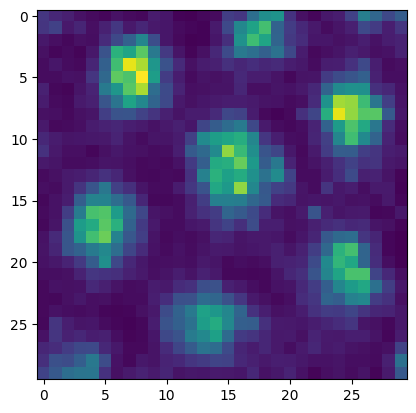

43


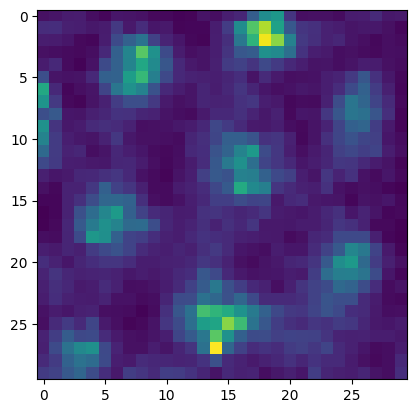

44


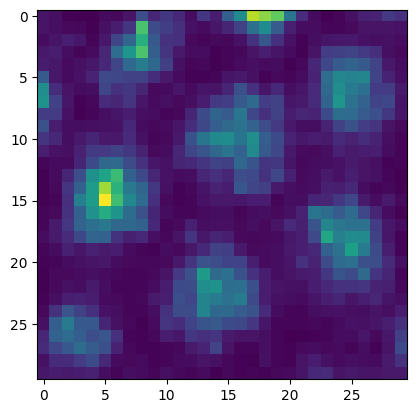

45


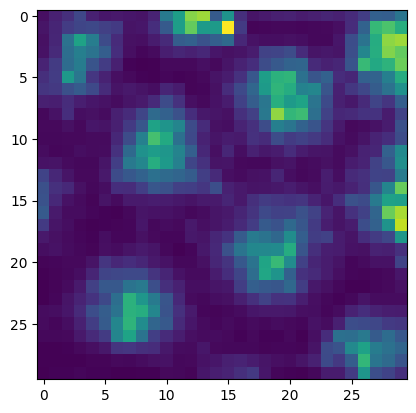

46


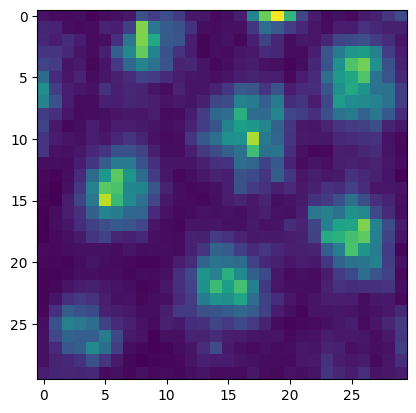

47


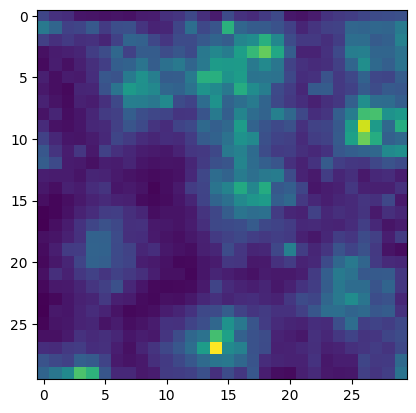

48


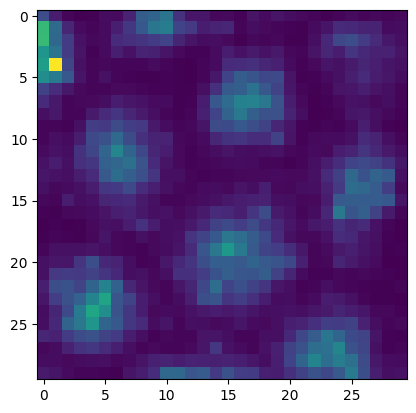

49


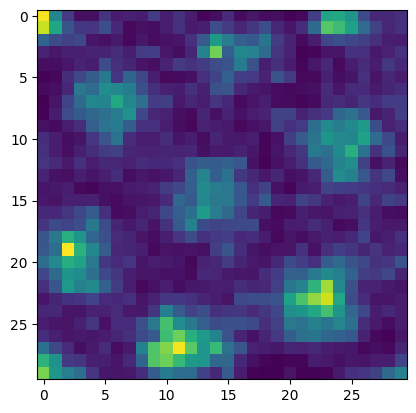

50


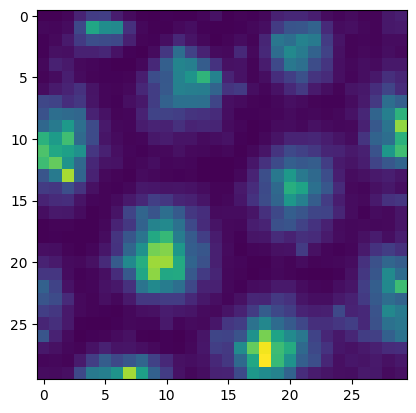

51


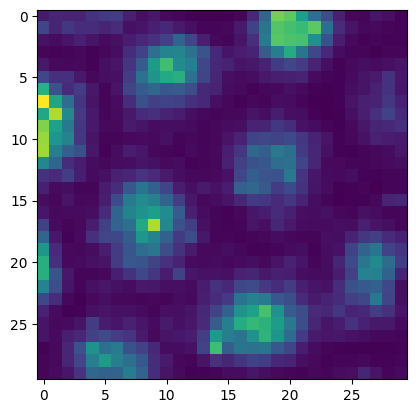

52


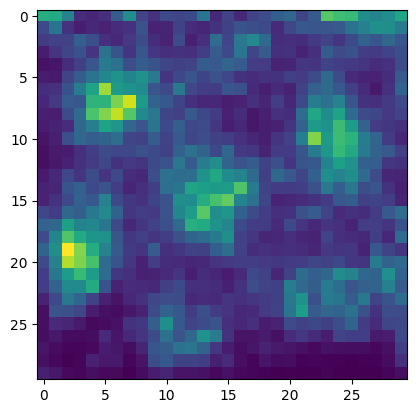

53


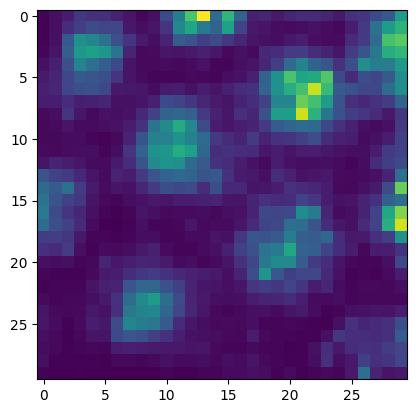

54


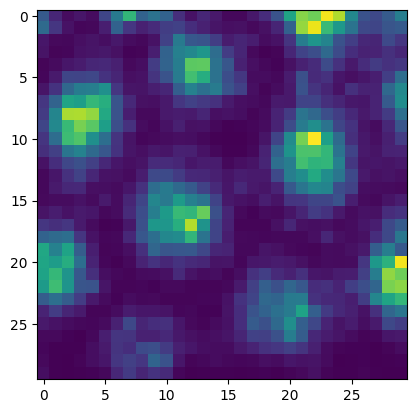

55


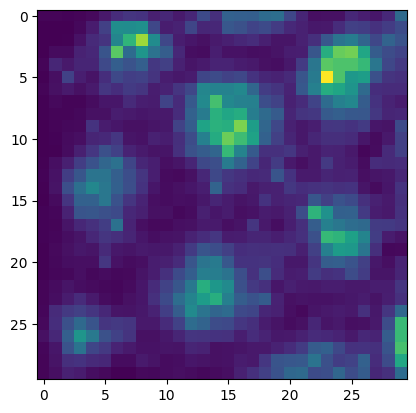

56


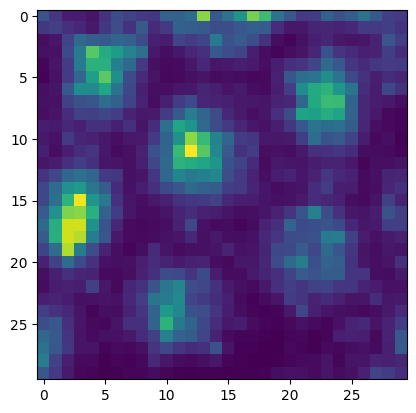

57


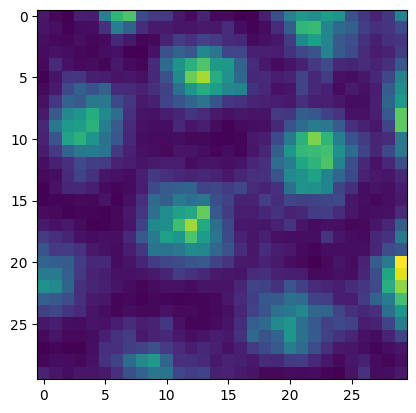

58


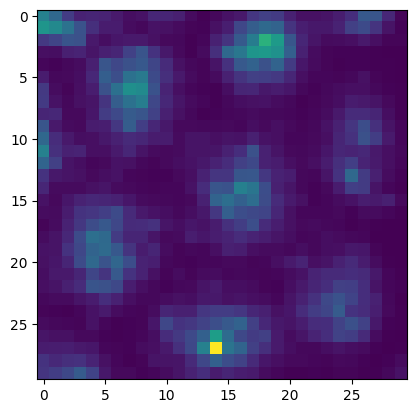

59


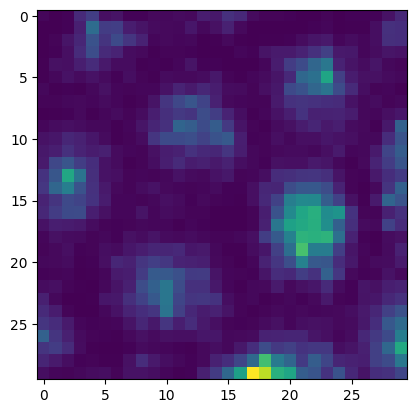

60


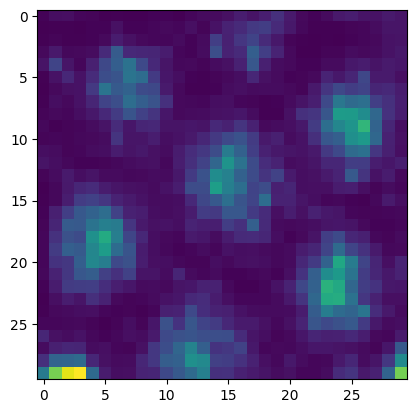

61


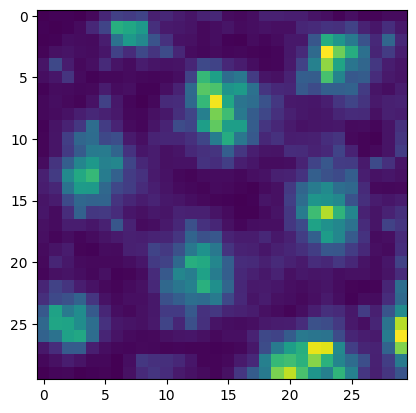

62


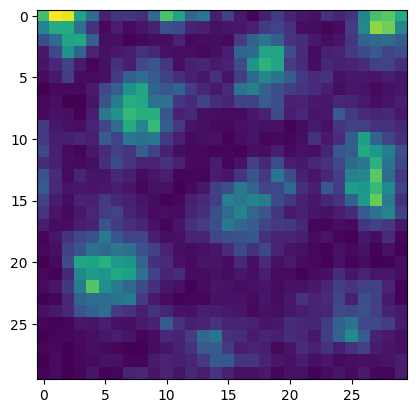

63


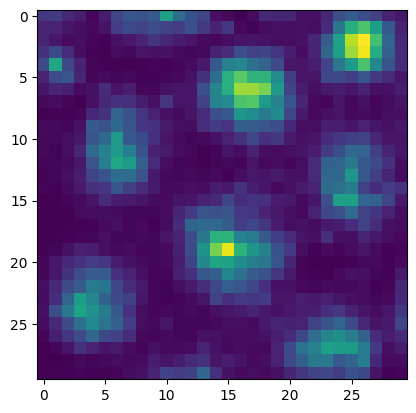

64


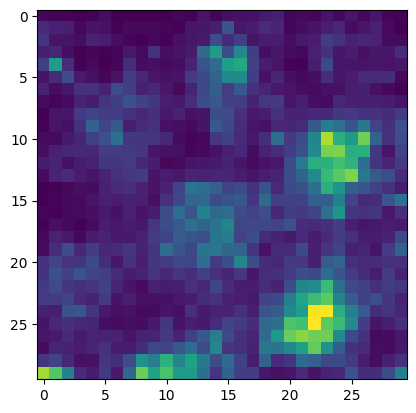

65


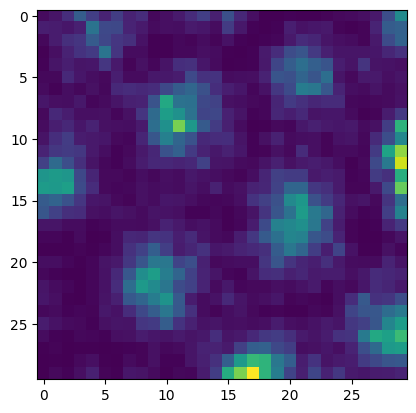

66


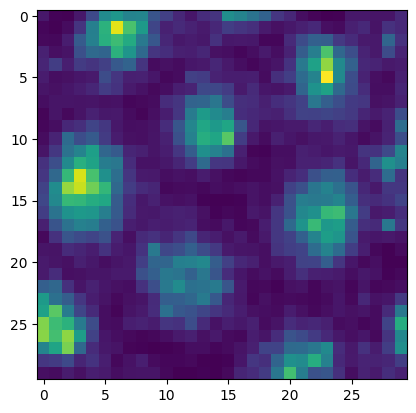

67


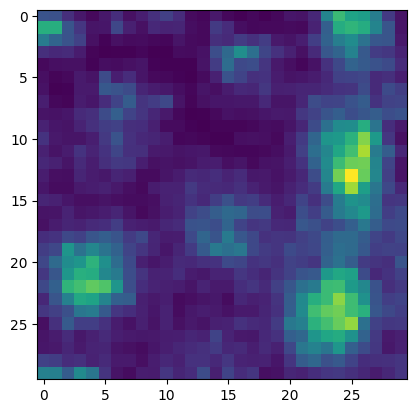

68


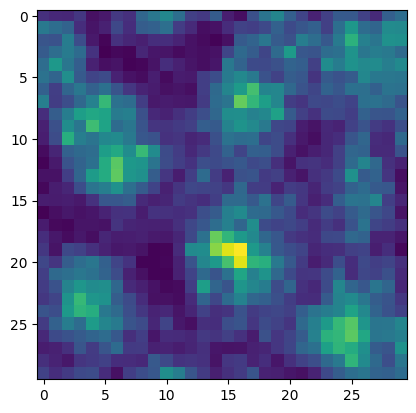

69


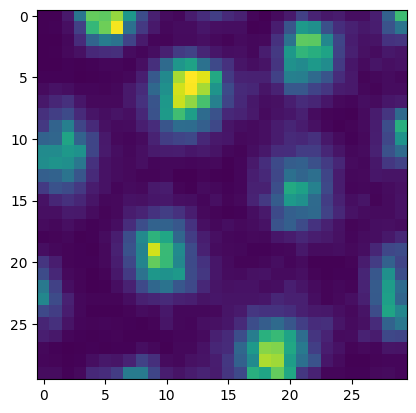

70


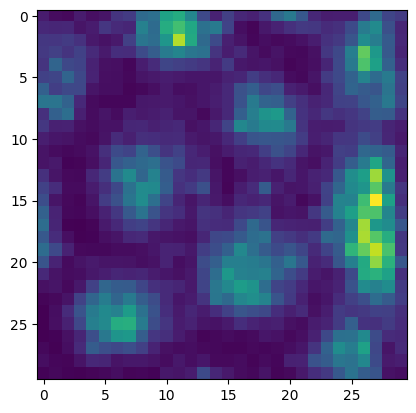

71


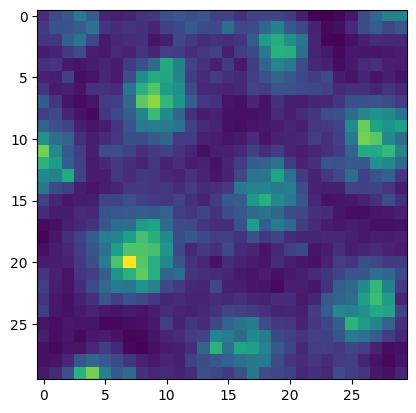

72


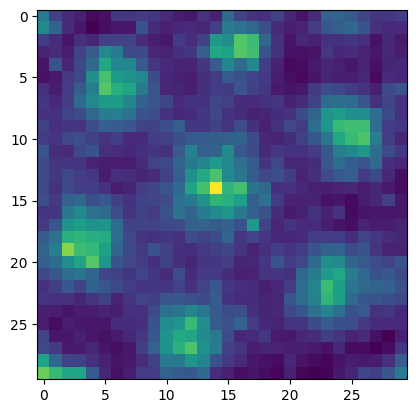

73


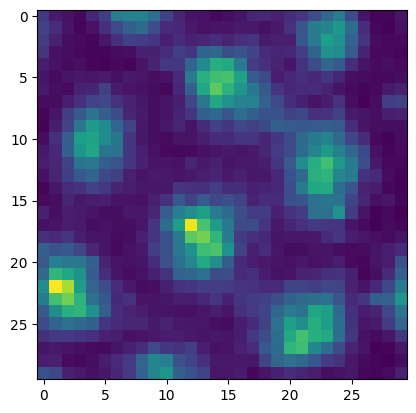

74


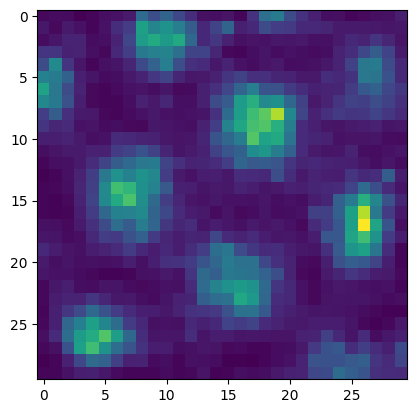

75


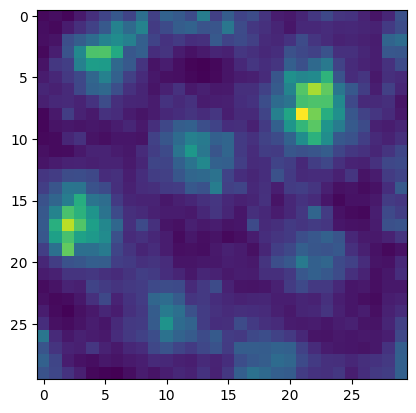

76


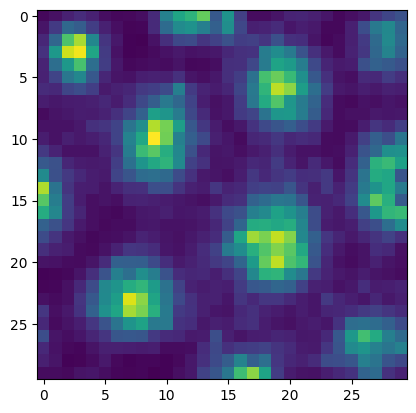

77


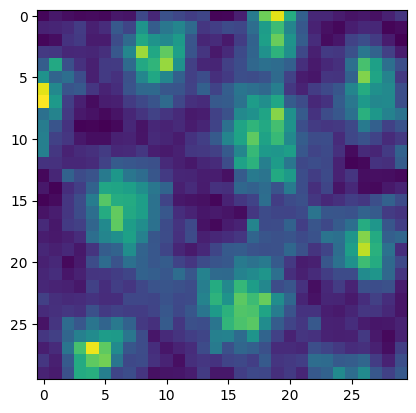

78


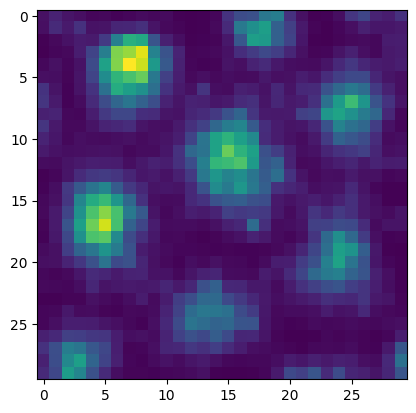

79


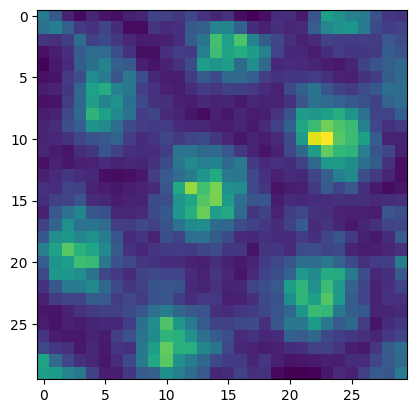

80


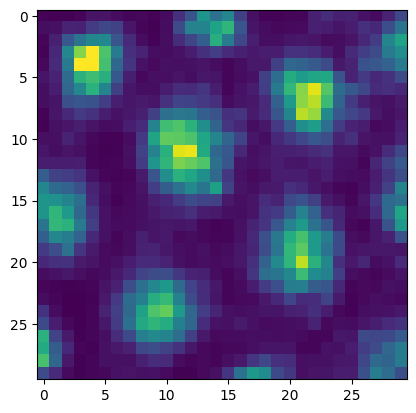

81


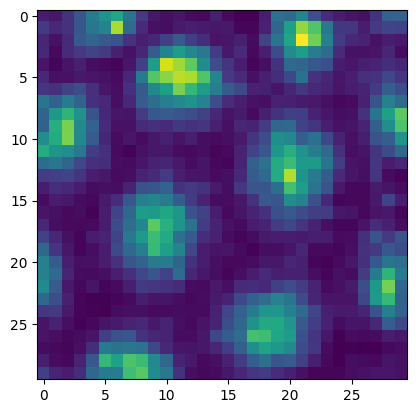

82


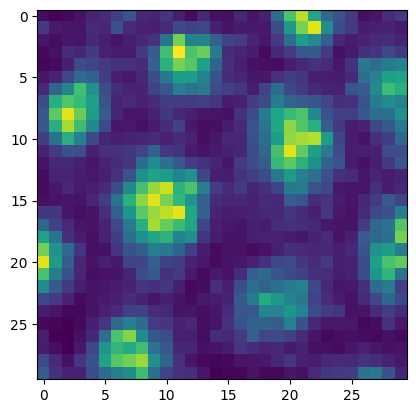

83


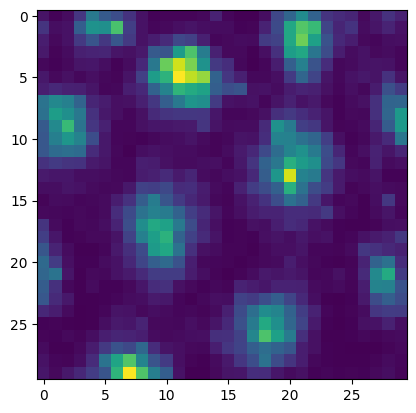

84


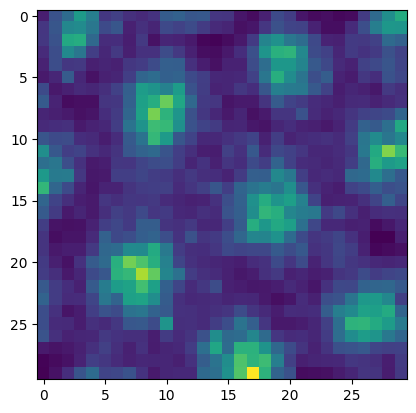

85


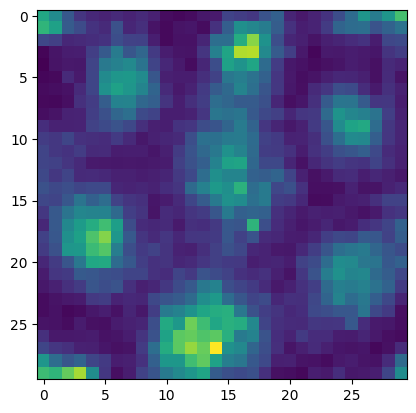

86


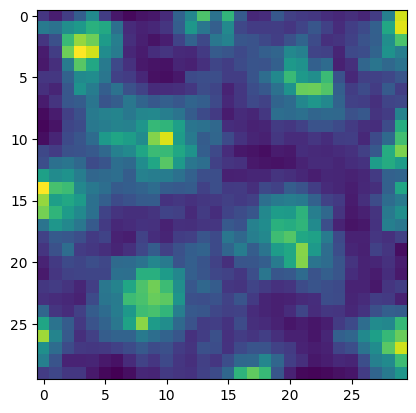

87


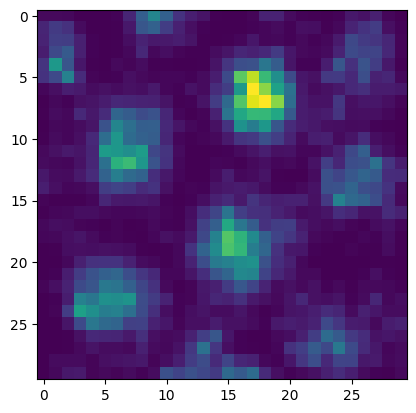

88


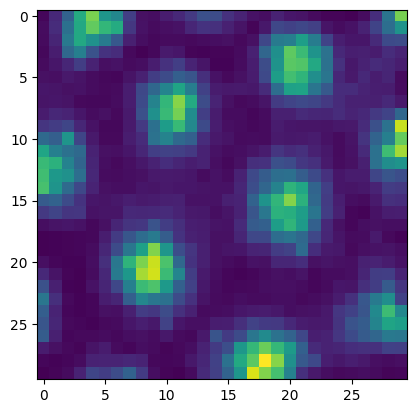

89


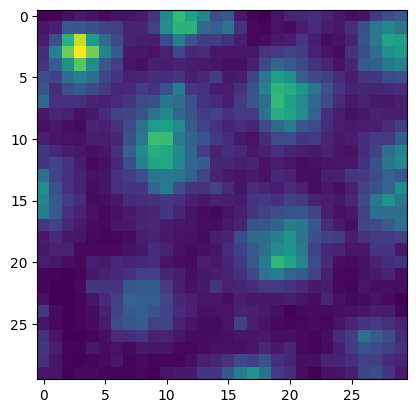

90


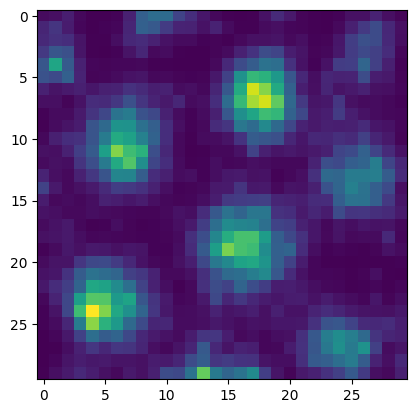

91


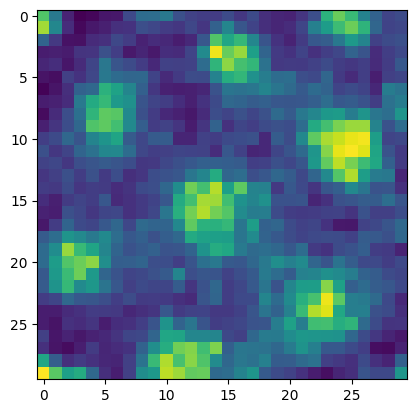

92


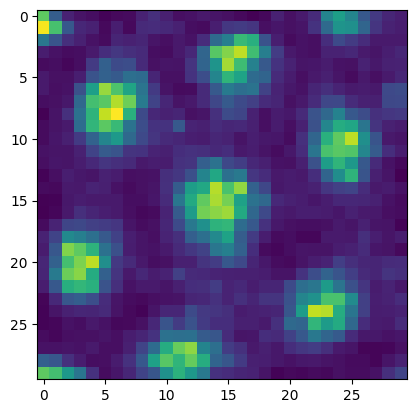

93


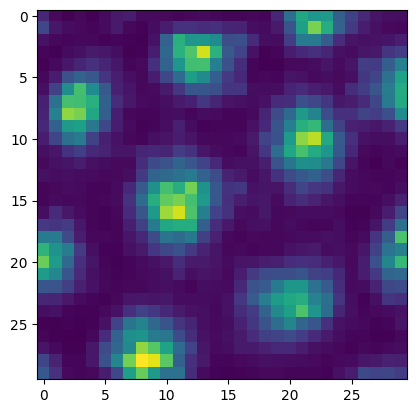

94


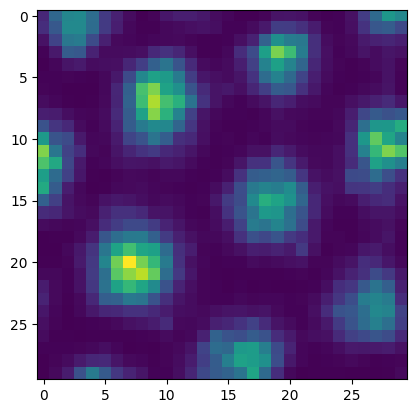

95


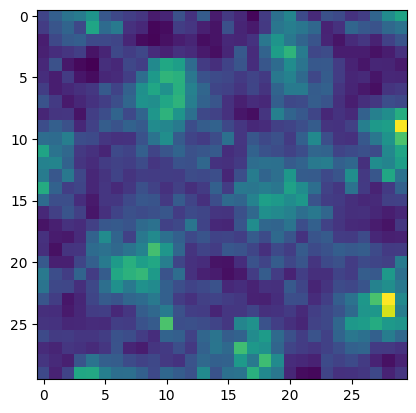

96


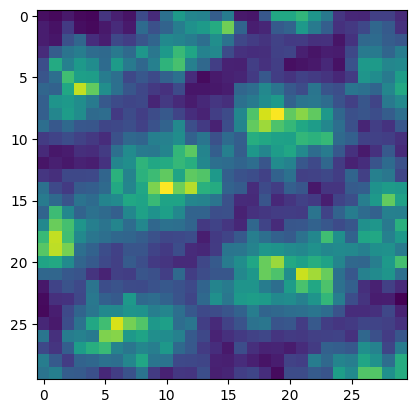

97


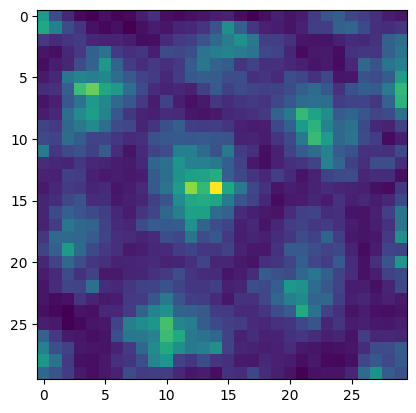

98


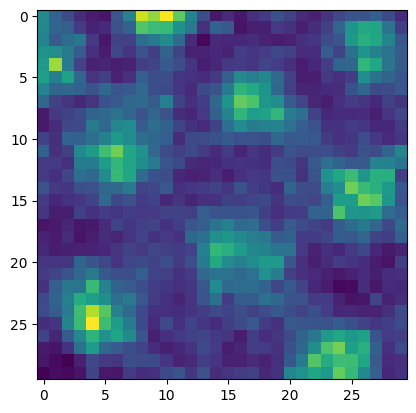

99


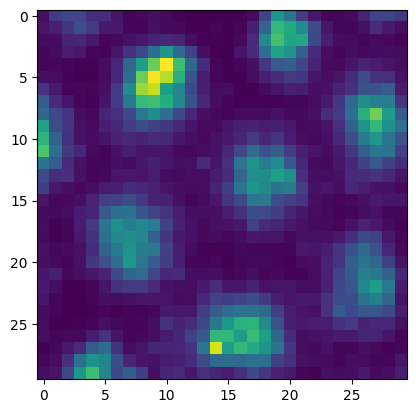

100


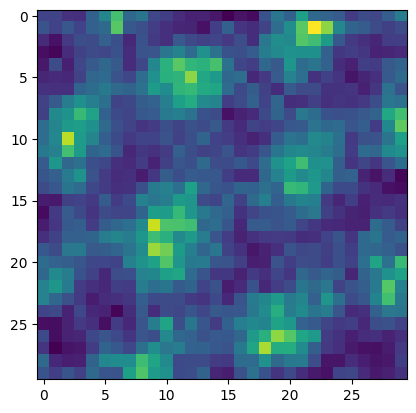

101


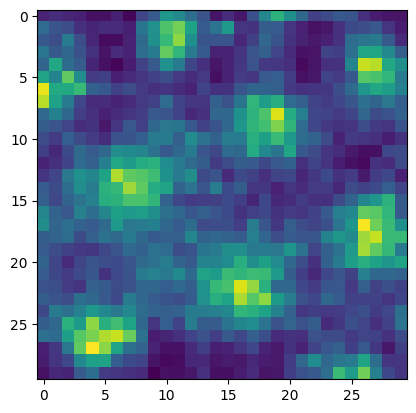

102


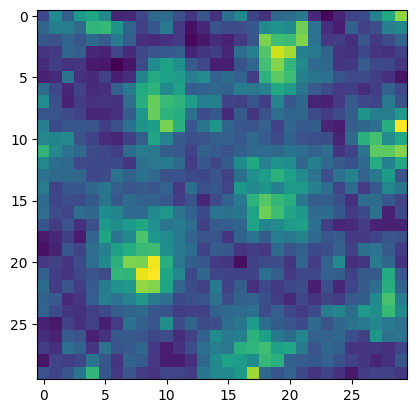

103


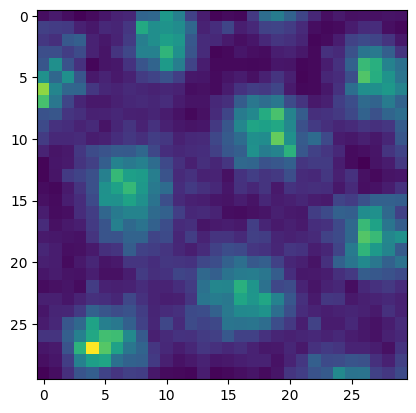

104


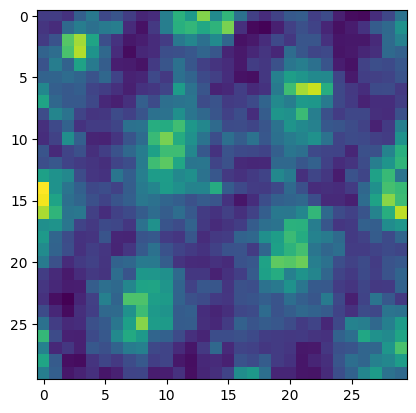

105


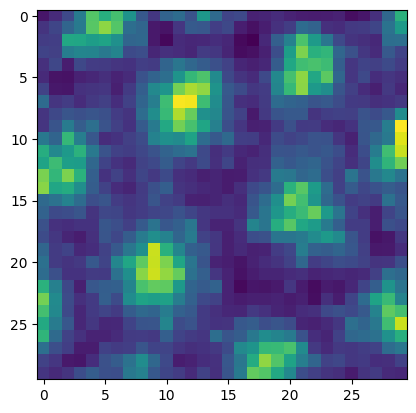

106


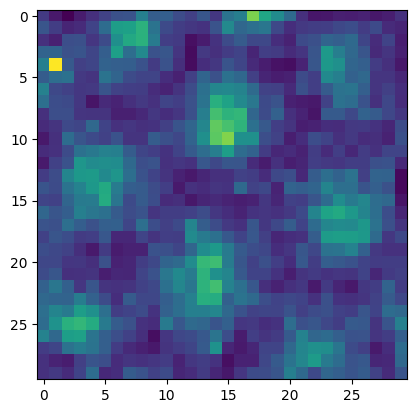

107


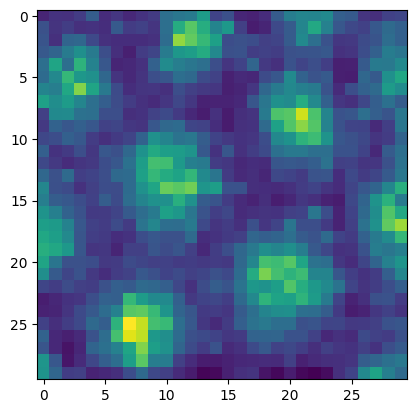

108


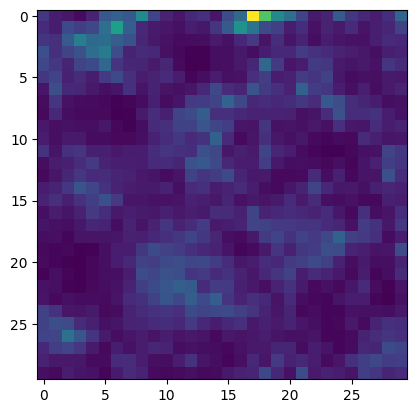

109


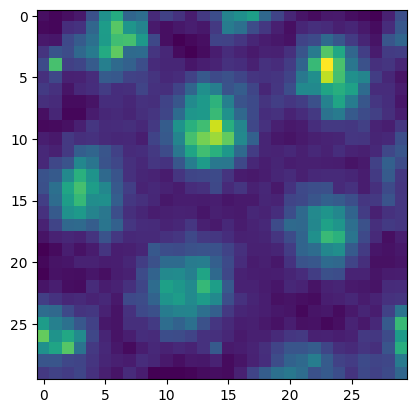

110


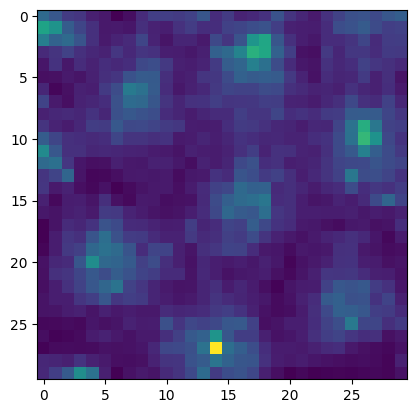

111


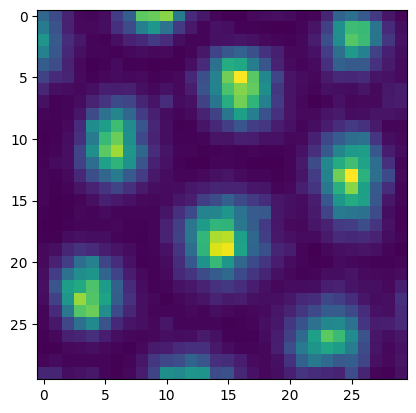

112


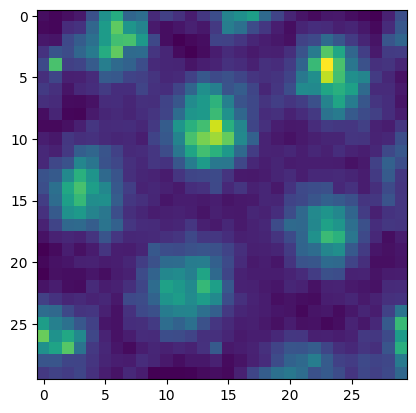

113


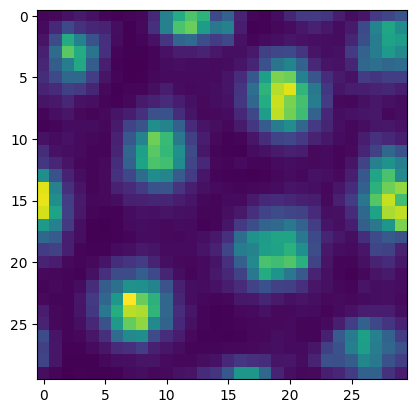

114


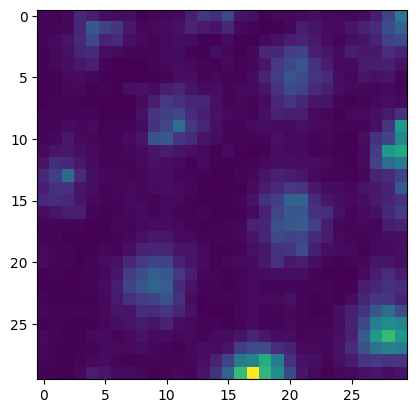

115


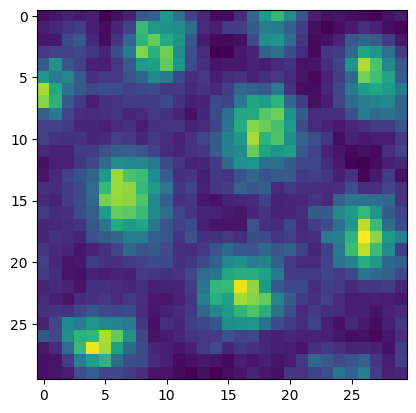

116


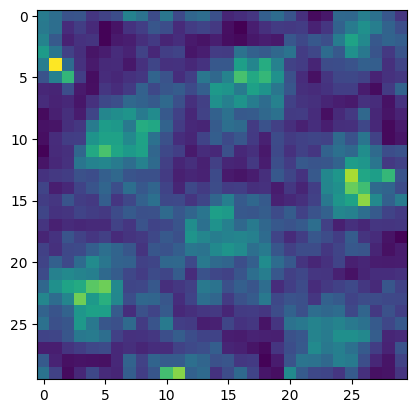

117


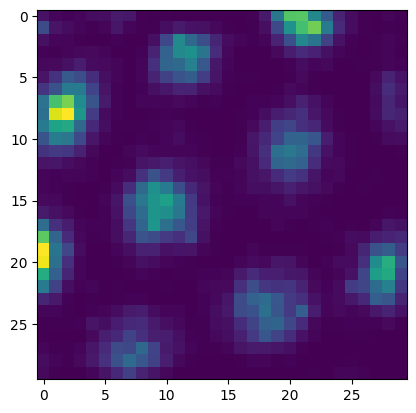

118


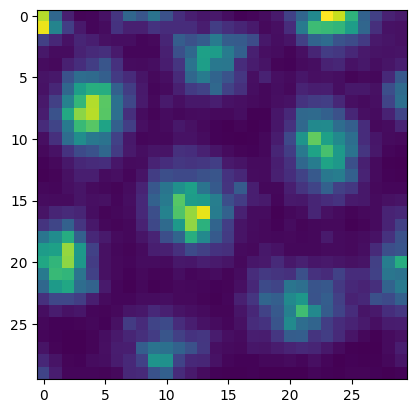

119


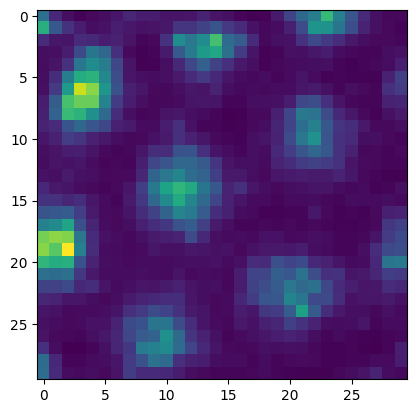

120


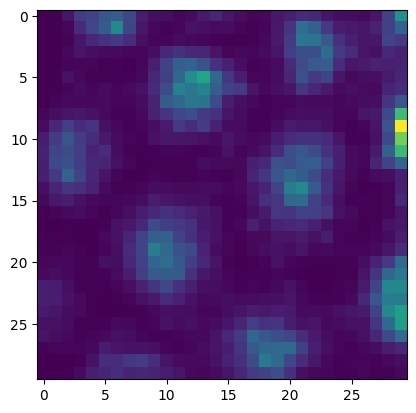

121


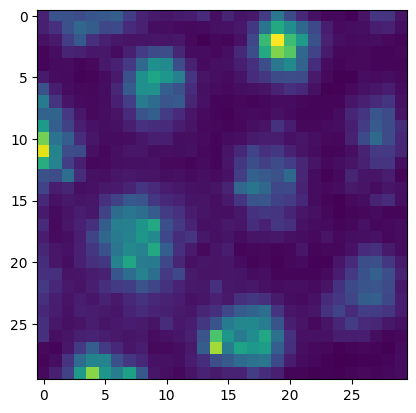

122


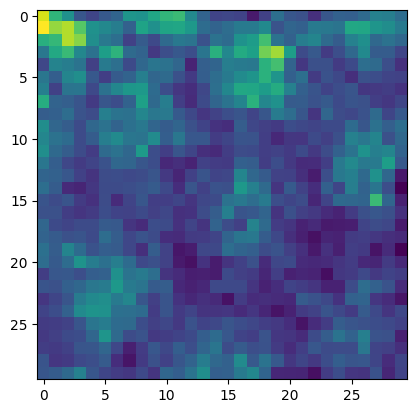

123


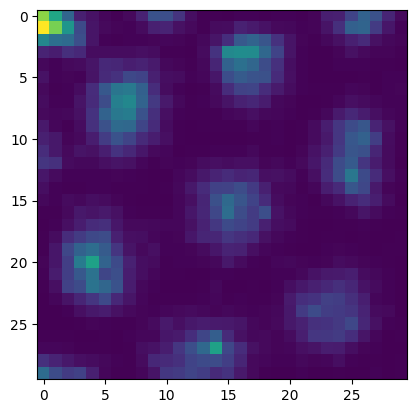

124


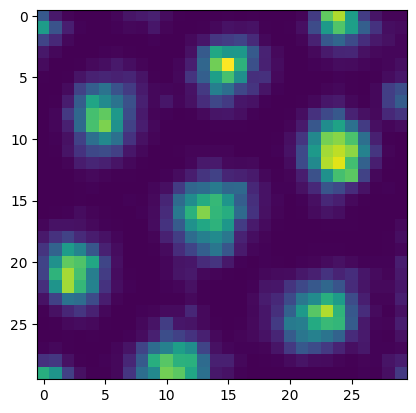

125


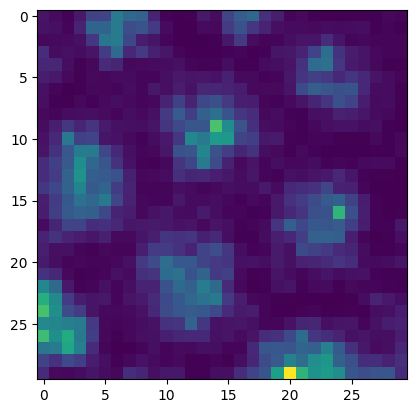

126


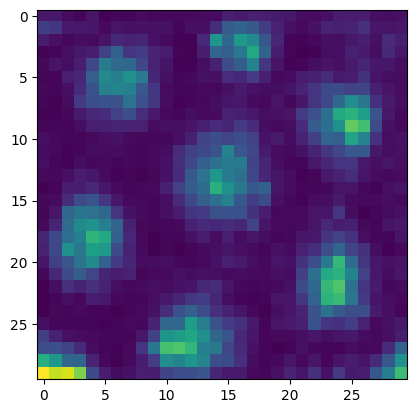

127


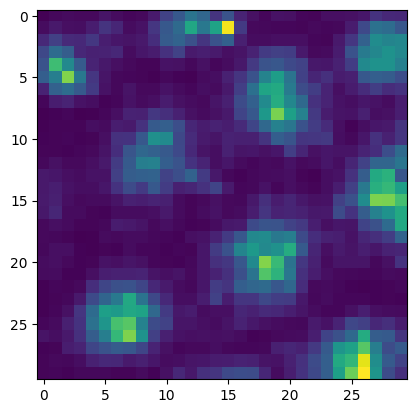

128


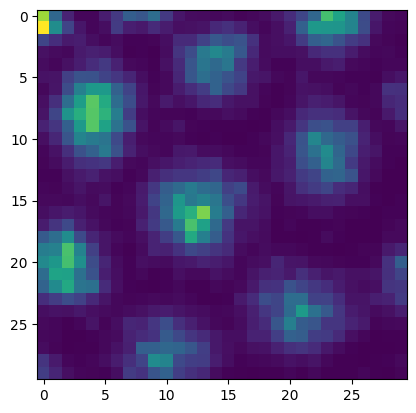

129


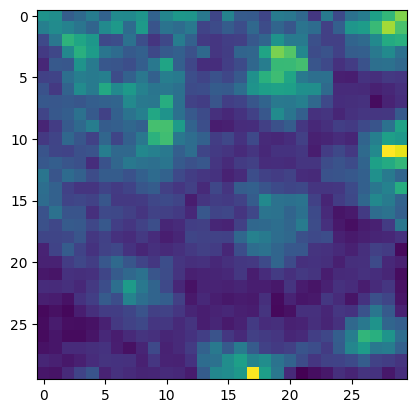

130


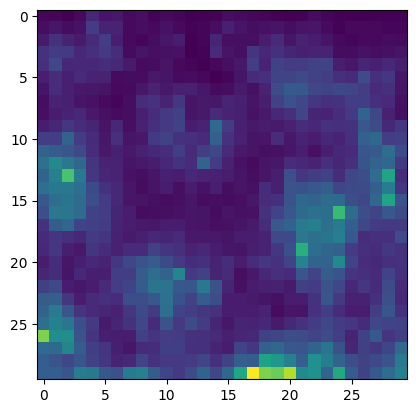

131


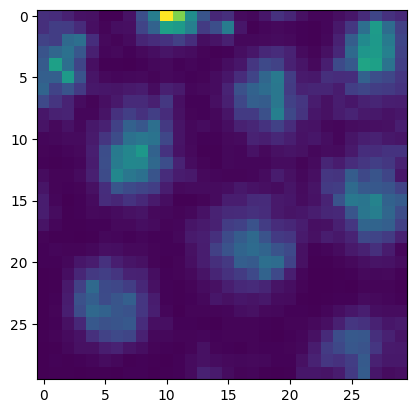

132


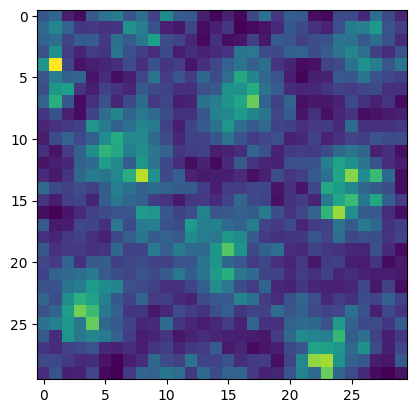

133


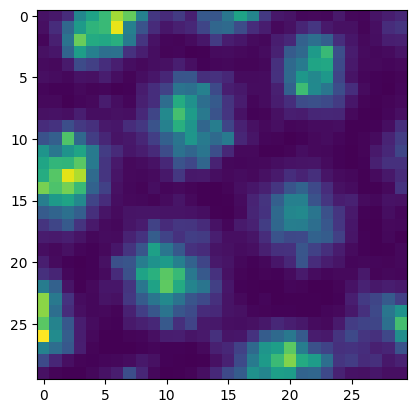

134


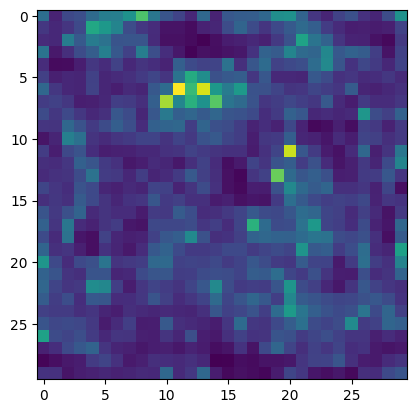

135


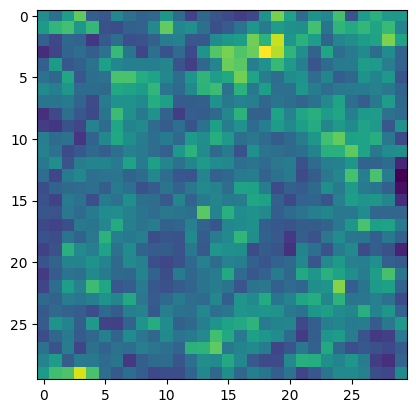

136


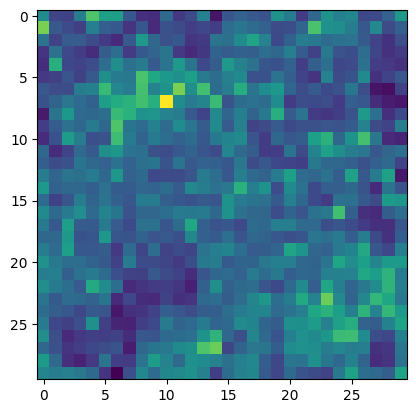

137


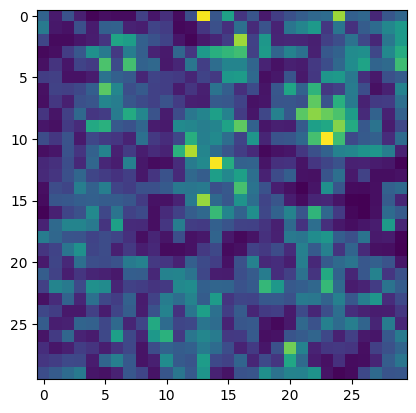

138


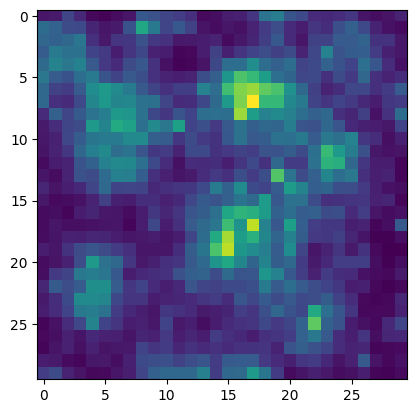

139


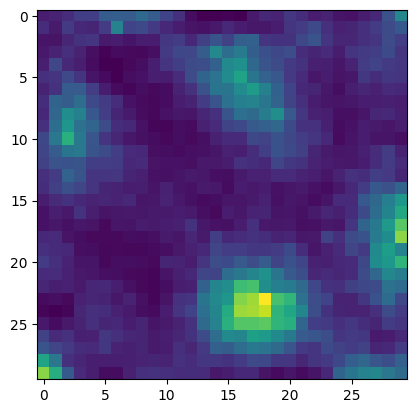

140


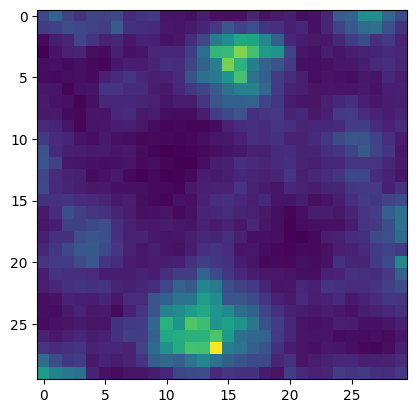

141


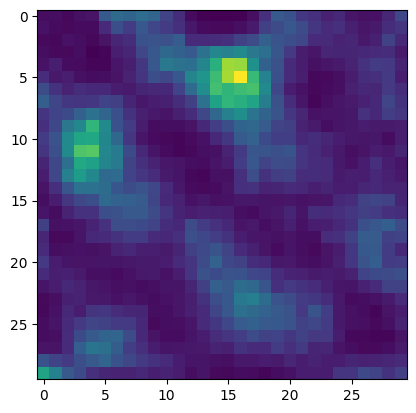

142


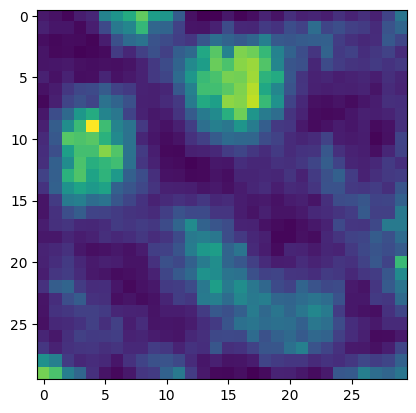

143


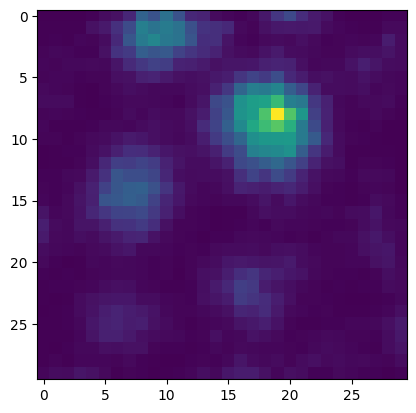

144


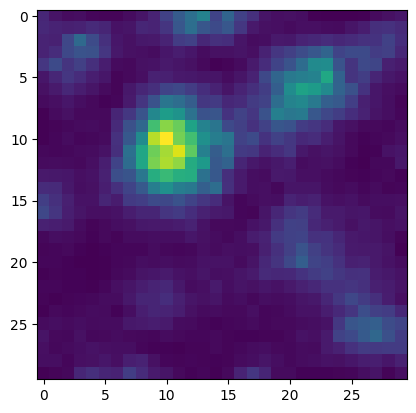

145


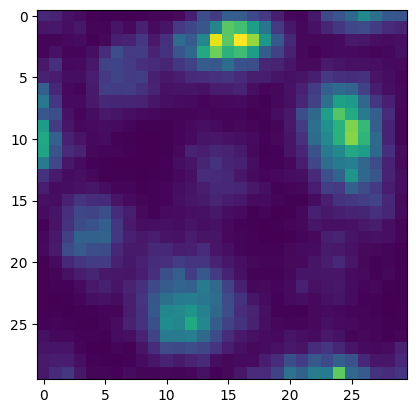

146


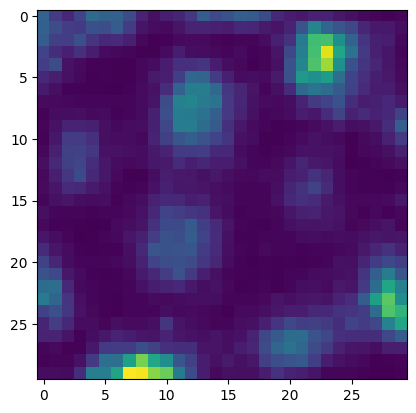

147


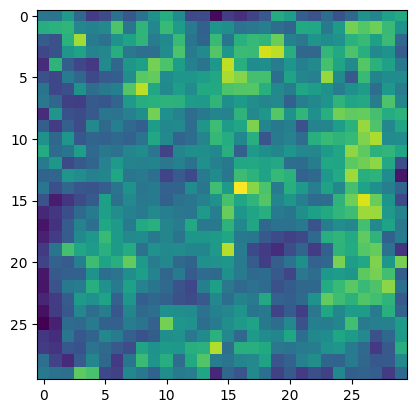

148


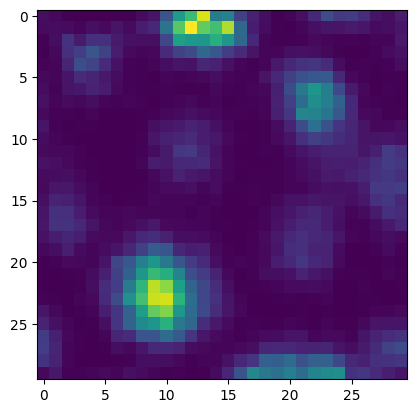

149


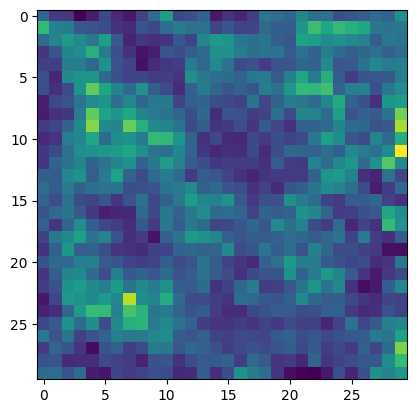

150


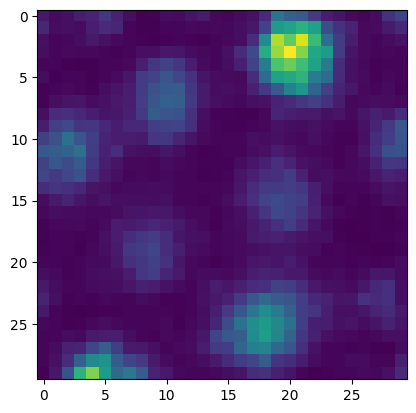

151


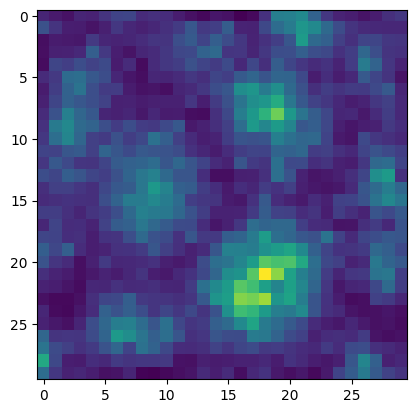

152


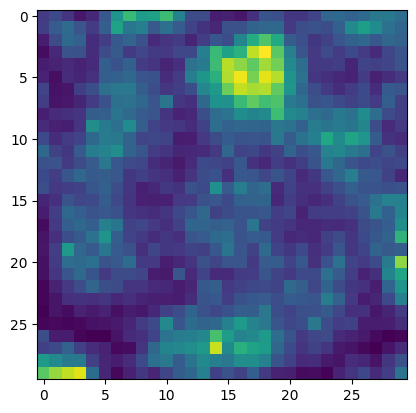

153


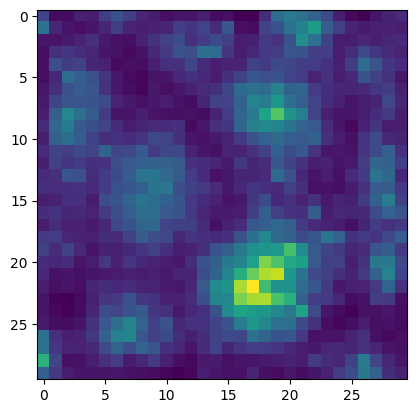

154


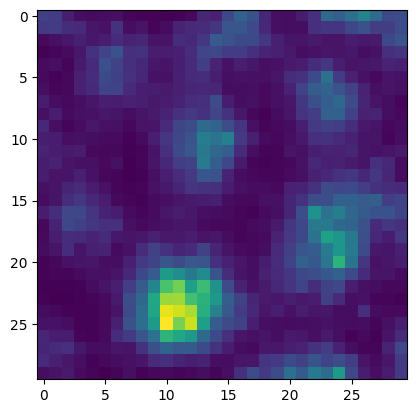

155


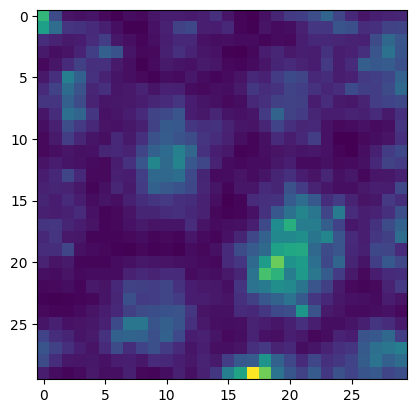

156


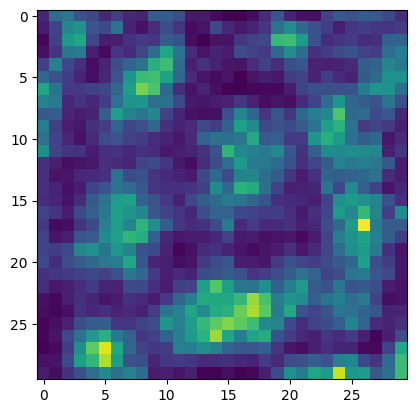

157


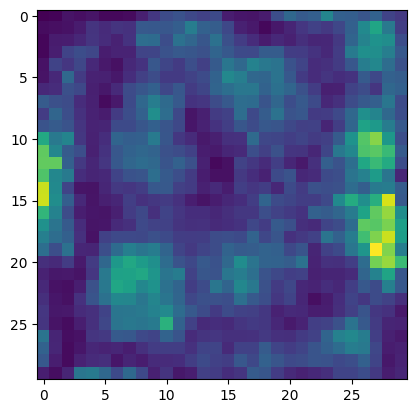

158


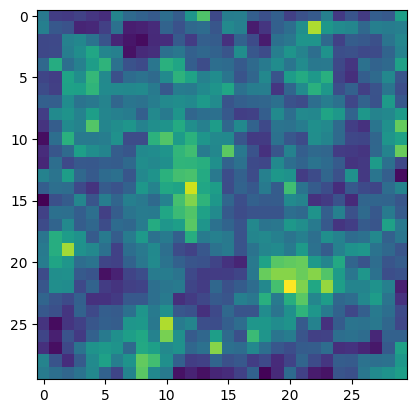

159


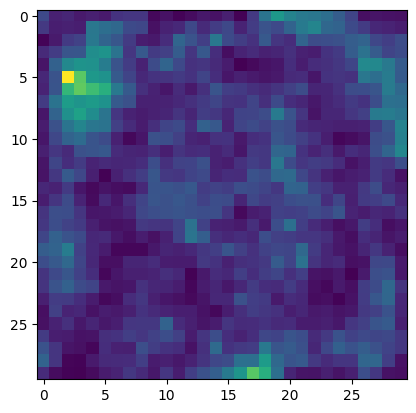

160


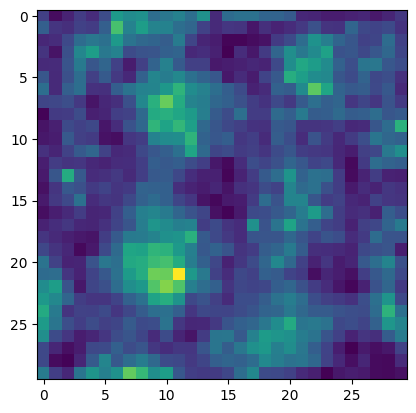

161


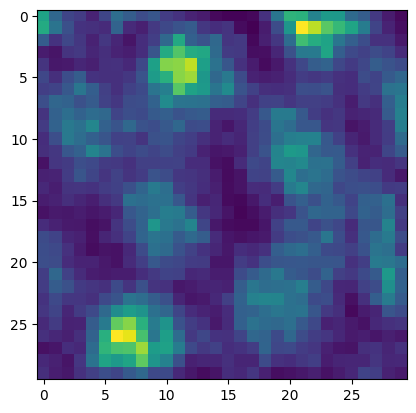

162


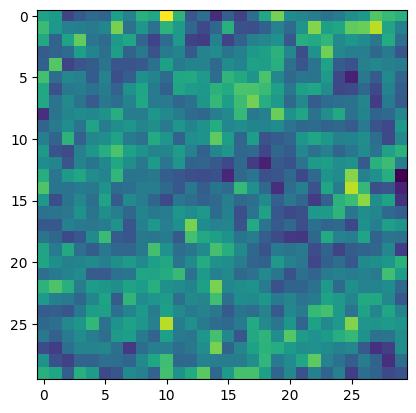

163


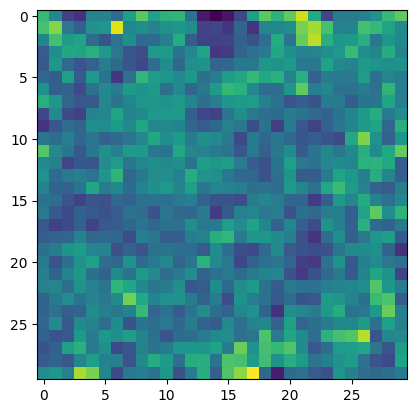

164


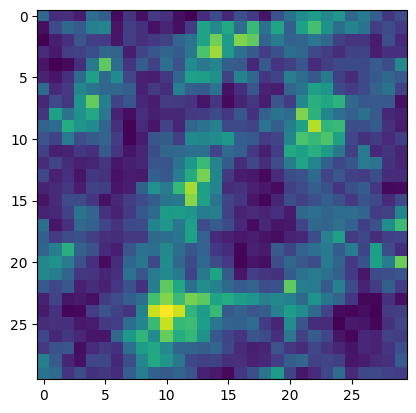

165


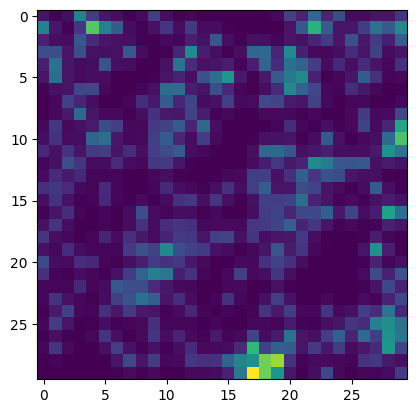

In [102]:
n_bins = 30
l0 = -0.725
l1 = 0.725
smooth_positions = discretize(positions.T,l0, l1, n_bins, "gaussian", 1)
fire_rate_grid = {}
for cell in pos.keys():
    print(cell)
    fire_rate = discretize(pos[cell], l0, l1, n_bins, "gaussian", 1)
    fire_rate_grid[cell] = (fire_rate/smooth_positions).flatten()
    plt.figure()
    plt.imshow(fire_rate/smooth_positions)
    plt.show()

Desafio: juntar estos datos para usarlo con CEBRA

### Extra: tipos de grid cells

Según el paper, hay distintos tipos de grid cells, podemos responder si el embedding cambia segun la funcionalidad de la grid cell? 


In [ ]:
#th_indx = pd.read_csv('class_grid_cells/rat_r_day1_grid_modules_1.matth_indx.csv', header=None).values[0]
#b_indx = pd.read_csv('class_grid_cells/rat_r_day1_grid_modules_1.matb_indx.csv', header=None).values[0]
#hd_indx = pd.read_csv('class_grid_cells/rat_r_day1_grid_modules_1.mathd_indx.csv', header=None).values[0]